#**introduction**

This notebook contains the first case study of Google's Data Analytics Professional Certificate. The case study requires the analyst to follow to the steps of the data analysis process (ask, prepare, process, analyze, share,and act) for a dataset that represents a fictional company (Cyclistic Bike-Share).

Until date, Cyclistic’s marketing strategy has focused on building general awareness and appealing to a wide range of consumers. “Casual” riders are customers who purchase single-ride or full-day passes. Cyclistic “members” are customers who purchase annual memberships.

Annual members are substantially more profitable than casual riders, according to Cyclistic’s financial analysts. The company’s future prosperity, according to the director of marketing, hinges on increasing the number of yearly subscribers. The full document to the case study can be found in the [Google Data Analytics Capstone: A Complete Case Study](https://www.coursera.org/learn/google-data-analytics-capstone)

#**Phase 1: Ask**

**Defining a Problem**

As Cyclistic realized that having more annual customers than casual riders will improve their earnings. They want to reach out to their “casual” riders, to convince them to switch to an annual subscription. In order to do so, they must first determine how the “casual” and “annual” customers differ in order to create a targeted and effective marketing message for the “casual” customers.

**business Task**

The business task is to identify the differences between casual and annual riders in order to come up with a proper message to campaign to the casual users convincing them to switch to annual subscription. 


#**Phase 2: Prepare**

**Data Preparation**

**Source of Data**
-Data was collected from [Motivate International Inc](https://divvy-tripdata.s3.amazonaws.com/index.html) under this [license](https://ride.divvybikes.com/data-license-agreement). Hence, it is public data.
-Since Cyclistic is a fictional company, the datasets have different names.

**Data Oraganization**

-12 CSV.files

-13 Variables

####Data credibility
-The data appears to be in good condition, and it is first-hand information, with a large number of entries and a lot of important information.

The datasets contain data of rides from May,2021 to April, 2022. Each rides contains basic information such as the start date and time, end date and time, and whether the customer was a casual user or a member.

**install the required packages**

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Import Dataset**

In [2]:
X202204_divvy_tripdata <- read_csv("../input/cyclistic/202204-divvy-tripdata.csv")
X202203_divvy_tripdata <- read_csv("../input/cyclistic/202203-divvy-tripdata.csv")
X202202_divvy_tripdata <- read_csv("../input/cyclistic/202202-divvy-tripdata.csv")
X202201_divvy_tripdata <- read_csv("../input/cyclistic/202201-divvy-tripdata.csv")
X202112_divvy_tripdata <- read_csv("../input/cyclistic/202112-divvy-tripdata.csv")
X202110_divvy_tripdata <- read_csv("../input/cyclistic/202110-divvy-tripdata.csv")
X202111_divvy_tripdata <- read_csv("../input/cyclistic/202111-divvy-tripdata.csv")
X202109_divvy_tripdata <- read_csv("../input/cyclistic/202109-divvy-tripdata.csv")
X202108_divvy_tripdata <- read_csv("../input/cyclistic/202108-divvy-tripdata.csv")
X202107_divvy_tripdata <- read_csv("../input/cyclistic/202107-divvy-tripdata.csv")
X202106_divvy_tripdata <- read_csv("../input/cyclistic/202106-divvy-tripdata.csv")
X202105_divvy_tripdata <- read_csv("../input/cyclistic/202105-divvy-tripdata.csv")

Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

**Combining all dataset into one dataset called tripdata**

In [3]:
tripdata <- rbind(X202105_divvy_tripdata,X202106_divvy_tripdata,X202107_divvy_tripdata,X202108_divvy_tripdata,X202109_divvy_tripdata,X202110_divvy_tripdata,X202111_divvy_tripdata,X202112_divvy_tripdata,X202201_divvy_tripdata,X202202_divvy_tripdata,X202203_divvy_tripdata,X202204_divvy_tripdata)


#**Phase 3: Process**

**First, let's see how data looks.**

In [4]:
summary(tripdata)

   ride_id          rideable_type        started_at                 
 Length:5757551     Length:5757551     Min.   :2021-05-01 00:00:11  
 Class :character   Class :character   1st Qu.:2021-07-07 14:52:45  
 Mode  :character   Mode  :character   Median :2021-08-31 17:17:20  
                                       Mean   :2021-09-18 18:21:45  
                                       3rd Qu.:2021-11-03 20:25:37  
                                       Max.   :2022-04-30 23:59:54  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-05-01 00:03:26   Length:5757551     Length:5757551    
 1st Qu.:2021-07-07 15:16:14   Class :character   Class :character  
 Median :2021-08-31 17:34:09   Mode  :character   Mode  :character  
 Mean   :2021-09-18 18:42:54                                        
 3rd Qu.:2021-11-03 20:38:44                                        
 Max.   :2022-05-02 00:35:01      

**Adding new date variables(Data Acquisition)**

Next, we will add columns that list the date, month, day of week, and year of each ride. This will allow us to aggregate ride data for each month, day, or year.

In [5]:
tripdata$date <- as.Date(tripdata$started_at)

tripdata$month <- format(as.Date(tripdata$date), "%m")
tripdata$day <- format(as.Date(tripdata$date), "%d")
tripdata$year <- format(as.Date(tripdata$date), "%y")
tripdata$day_of_week <- format(as.Date(tripdata$date), "%a")

Now, we will add a column for the ride length for each ride by finding the time difference between the ride's start time and end time.

In [6]:
tripdata$ride_length <- difftime(tripdata$ended_at,tripdata$started_at, units = "mins")

**Data cleaning**

There is some "bad" data to remove where the ride_length is negative due to maintence removing bikes for quality checks. We will create a new data frame without these rides that have negative ride lengths.Also remove some geological detail columns which is not in our analysis and save it in new dataframe so our original file remain unchanged for future use.

In [7]:
tripdata <- tripdata %>%
  select(-c(start_lat,start_lng,end_lat,end_lng))
tripdata2 <- tripdata[!(tripdata$ride_length<0),]

**Let's how our datafram finally looks.**

In [8]:
glimpse(tripdata2)

Rows: 5,757,411
Columns: 15
$ ride_id            <chr> "C809ED75D6160B2A", "DD59FDCE0ACACAF3", "0AB83CB88C…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-05-30 11:58:15, 2021-05-30 11:29:14, 2021-05-…
$ ended_at           <dttm> 2021-05-30 12:10:39, 2021-05-30 12:14:09, 2021-05-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ member_casual      <chr> "casual", "casual", "casual", "casual", "casual", "…
$ date               <date> 2021-05-30, 2021-05-30, 2021-05-30, 2021-05-30, 20…
$ month              <chr> "05", "05", "05", "05", "05", "05", "05", "05", "05…
$ day                <chr> "30", "30", "30", "30", "30", "30", "30", "05", "05…
$ year      

#**Phase 4: Analyze**

**Identifying Trends and Relationships**

**Descriptive Statistics**-> I performed descriptive statistics to identify differences in behavior between casual and member users.
calculate the mean, median, max and min values of ride_length for casual and member type users (descriptive statistics)

In [9]:
aggregate(tripdata2$ride_length ~ tripdata2$member_casual, FUN = mean)
aggregate(tripdata2$ride_length ~ tripdata2$member_casual, FUN = median)
aggregate(tripdata2$ride_length ~ tripdata2$member_casual, FUN = max)
aggregate(tripdata2$ride_length ~ tripdata2$member_casual, FUN = min)

tripdata2$member_casual,tripdata2$ride_length
<chr>,<drtn>
casual,31.29203 mins
member,13.14491 mins


tripdata2$member_casual,tripdata2$ride_length
<chr>,<drtn>
casual,15.566667 mins
member,9.183333 mins


tripdata2$member_casual,tripdata2$ride_length
<chr>,<drtn>
casual,55944.15 mins
member,1559.90 mins


tripdata2$member_casual,tripdata2$ride_length
<chr>,<drtn>
casual,0 mins
member,0 mins


#**Phase 5: Share**

Before we make our recommendations for the marketing department, we will create some data visualizations to both share with our stakeholders as well as give us a better idea of what insights to share.

**1.Average riding duration between casual and member riders.**

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



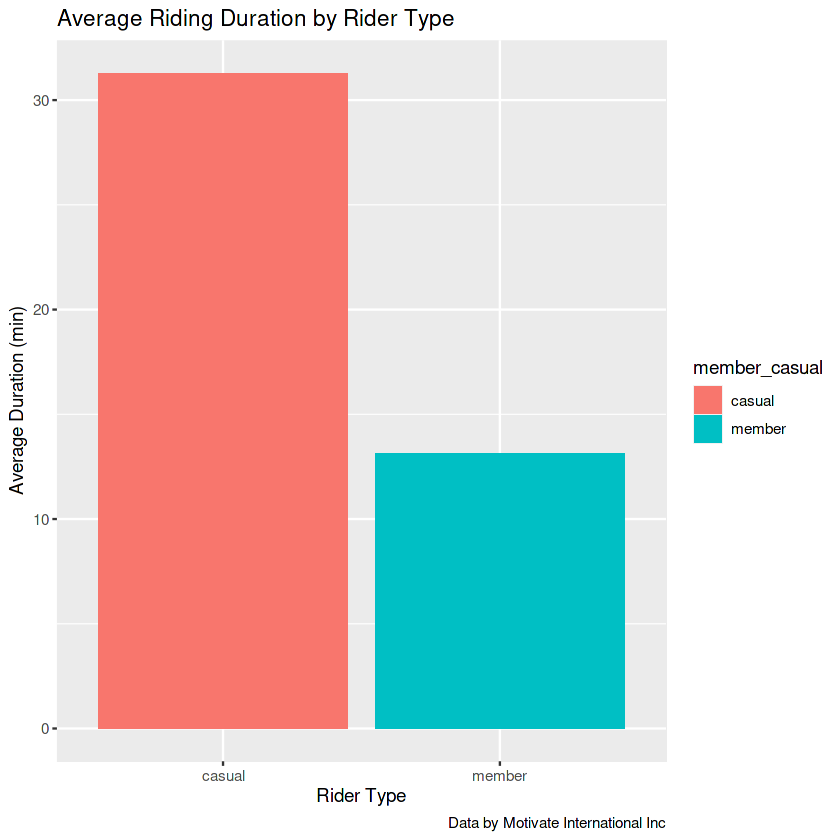

In [10]:
tripdata2 %>% 
  group_by(member_casual) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  ggplot(aes(x = member_casual, y = average_duration,fill=member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Rider Type", y = "Average Duration (min)", title = "Average Riding Duration by Rider Type", caption = "Data by Motivate International Inc")

**2.Average riding duration of each day of the week between casual and member riders.**

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



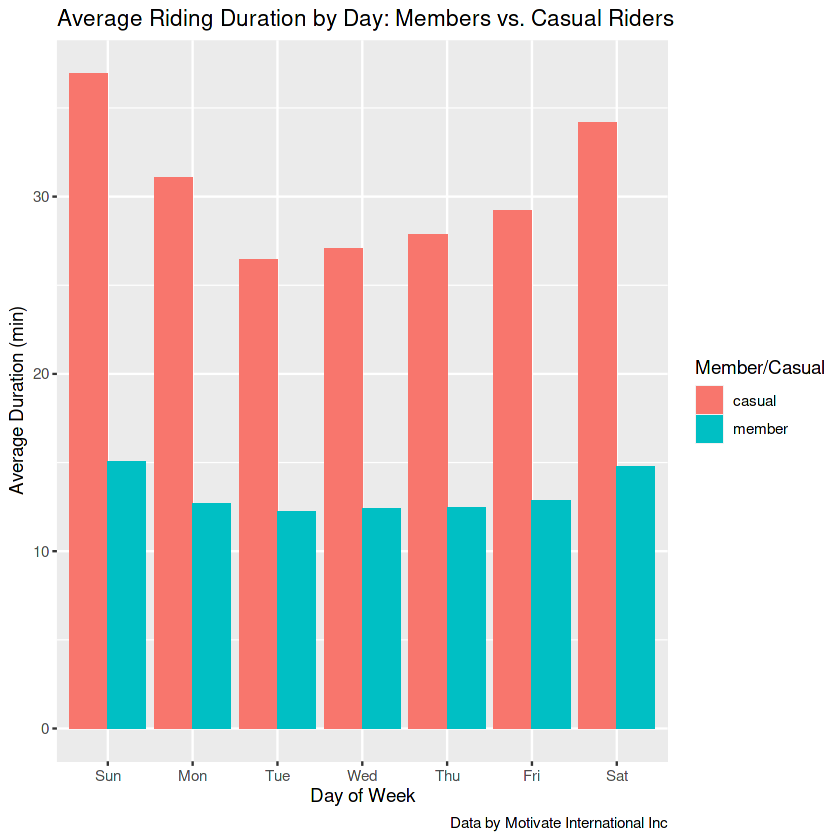

In [11]:
tripdata2 %>% 
  mutate(weekday = wday(started_at, label = TRUE))%>%
  group_by(member_casual,weekday) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  arrange(member_casual,weekday) %>% 
  ggplot(aes(x = weekday, y = average_duration, fill= member_casual)) +
  geom_col(position = "dodge") +
  labs(x = "Day of Week", y = "Average Duration (min)", 
       fill = "Member/Casual",
       title = "Average Riding Duration by Day: Members vs. Casual Riders", caption = "Data by Motivate International Inc")


**3.Number of rides taken by each customer type during the week.**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


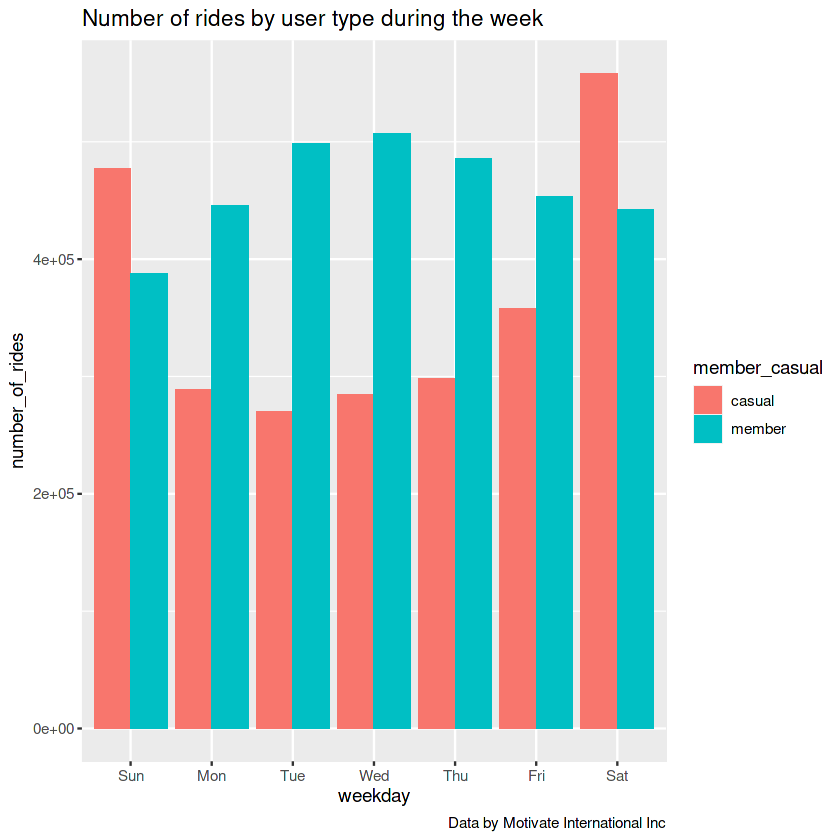

In [12]:
tripdata2 %>%
  mutate(weekday = wday(started_at, label = TRUE))%>%
  group_by(member_casual, weekday)%>%
  summarise(number_of_rides=n(),average_duration=mean(ride_length))%>%
  arrange(member_casual, weekday)%>%
  ggplot(aes(x=weekday,y=number_of_rides,fill=member_casual))+
  geom_col(position="dodge") + 
  labs(title = "Number of rides by user type during the week", caption = "Data by Motivate International Inc")

#**Key Findings**

**Differences in behavior between Casual and Member users**

-On average Casual users ride at least 25 minutes whilst Member users ride between 12-15 minutes at most.

-The average riding duration for Casual users is longer on Saturday and Sunday (weekends) while member users ride more constantly through out the whole week.

-Our casual customers take the most rides of the weekends whilst memmber users are taken more ride on mid of the week. 

-There was no difference between casual and member users in how many rides they took each month. Both casual  and member users take the most number of rides in the summer months and the least number of rides in the late winter and early spring.

**Reccomendations**

1.Advertise how a membership can save money for those customers who take longer rides.

2.Target casual customers who rent a bike for leisure on their weekends by adding related to holiday, 
tourism or weekend to weekday promotions.

3.Create a large summer campaign when more people are likely to rent a bike.

**Further Analysis**

For further analysis, i think it will be necessary to know the preferred type of bikes, locations or most popular routes by casual users. This will help the company by to get insights which might lead them to offer the best promotions in those specific routes to convert more casual users to member users.

#**Thank You, i hope you like it.**